<a href="https://colab.research.google.com/github/SaPahlavani/Exercise.Vision/blob/main/3_Drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ترسیم تصاویر و اشکال در OpenCV

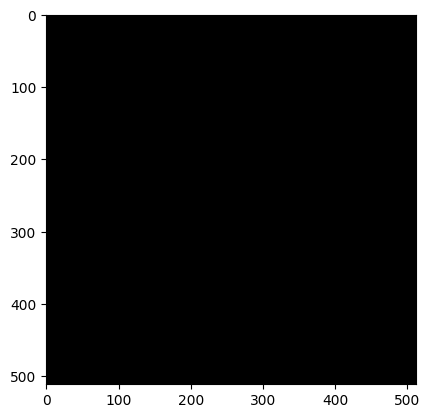

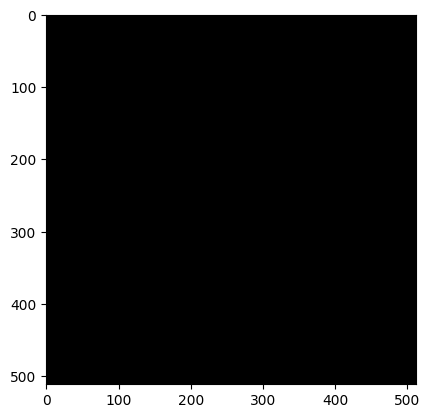

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a black image
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white?
image_bw = np.zeros((512,512), np.uint8)

plt.imshow(image[...,::-1])
plt.figure()
plt.imshow(image_bw, cmap='gray')

cv2.line(image, starting cordinates, ending cordinates, color, thickness)

In [64]:
from google.colab.patches import cv2_imshow

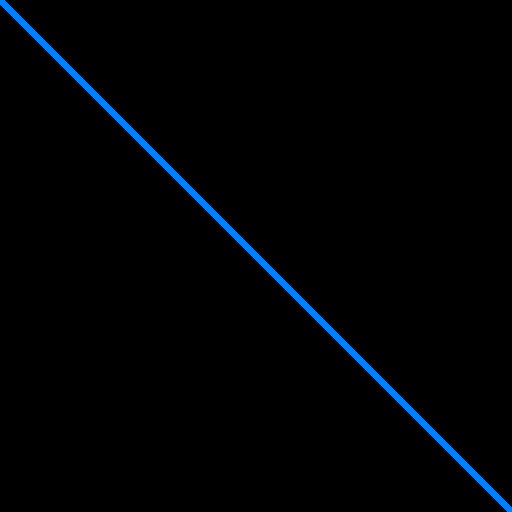

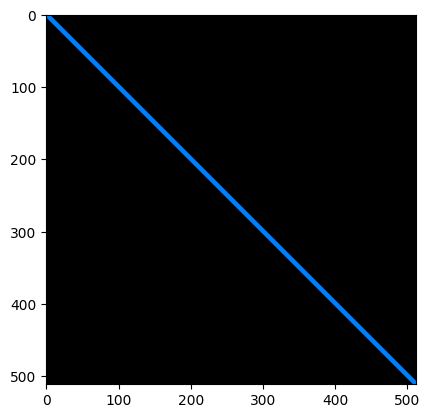

In [51]:
# Draw a diagonal blue line of thickness of 5 pixels
image = np.zeros((512,512,3), np.uint8)
cv2.line(image, (0,0), (511,511), (255,127,0), 5)
cv2_imshow(image)
plt.imshow(image[...,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

From the documentation, **OpenCV changes its behavior according to the type** of the array:

    If the image is 8-bit unsigned, it is displayed as is.
    If the image is 16-bit unsigned or 32-bit integer, the pixels are divided by 256. That is, the value range [0,255*256] is mapped to [0,255].
    If the image is 32-bit floating-point, the pixel values are multiplied by 255. That is, the value range [0,1] is mapped to [0,255].

https://stackoverflow.com/questions/23749968/why-datatype-has-to-be-uint8-in-opencv-python-wrapper

ترسیم مستطیل<br>
cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

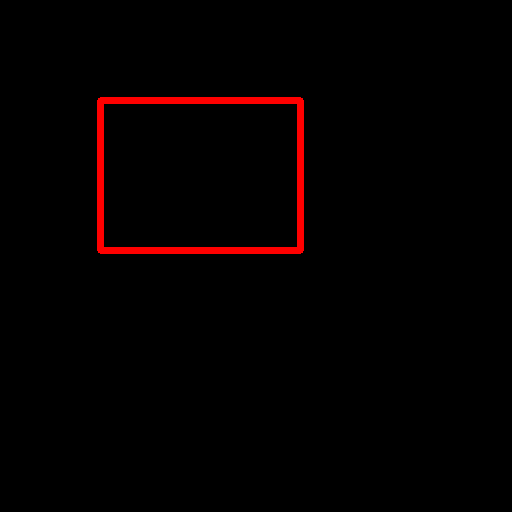

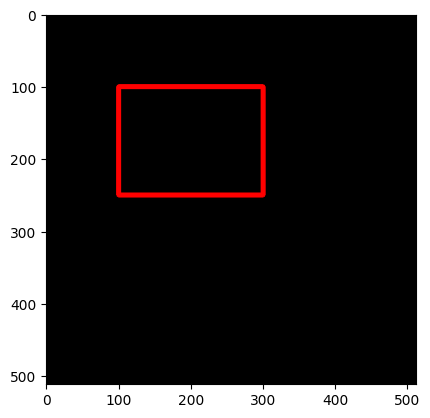

In [52]:
# Draw a Rectangle in
image = np.zeros((512,512,3), np.uint8)

cv2.rectangle(image, (100,100), (300,250), (0,0,255), 5)
cv2_imshow( image)
plt.imshow(image[...,::-1])

cv2.cirlce(image, center, radius, color, thickness)<br>
اگر thickness را منفی بدهیم چه میشود؟!

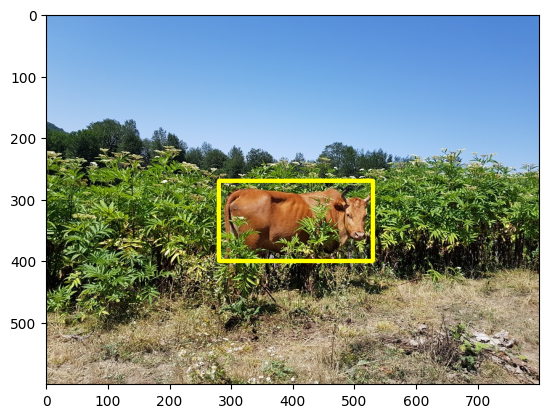

In [ ]:
# Split the image into the B,G,R components
img = cv2.imread("/content/drive/MyDrive/images/input (1).jpg")
cv2.rectangle(img, (280,270), (530,400), (0,255,255), 5)
plt.imshow(img[...,::-1])

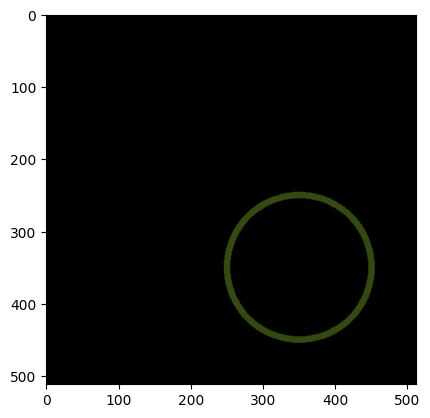

In [ ]:
image = np.zeros((512,512,3), np.uint8)
cv2.circle(image, (350, 350), 100, (15,75,50), 7)
plt.imshow(image[...,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

ترسیم بیضی

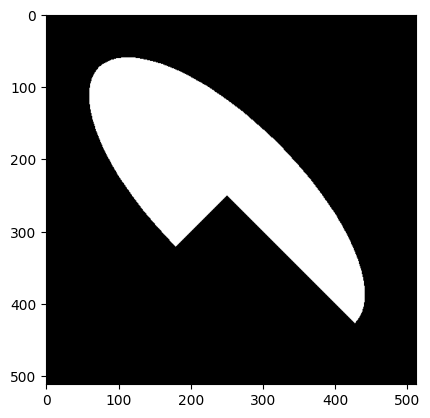

In [ ]:
ellipse = np.zeros((512,512,3), np.uint8)

cv2.ellipse(ellipse, (250, 250), (250, 100), 45, 90, 360, (255,255,255), -1)

plt.imshow(ellipse[...,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

ترسیم چند ضلعی

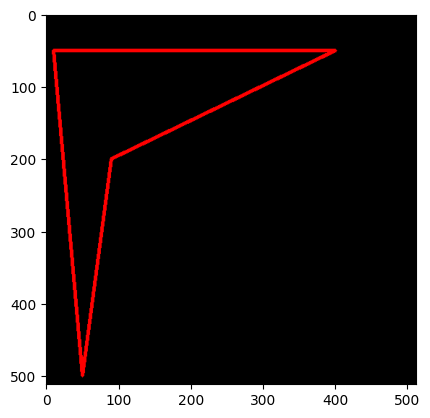

In [ ]:
image = np.zeros((512,512,3), np.uint8)

# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)
# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)
plt.imshow(image[...,::-1])

If third argument is False, you will get a polylines joining all the points, not a closed shape.
**cv2.polylines()** can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function.
All lines will be drawn individually. It is a much better and faster way to draw a group of lines than calling **cv2.line()** for each line.

https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html

cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)

    FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
    FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX
    FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
    FONT_HERSHEY_SCRIPT_SIMPLEX
    FONT_HERSHEY_SCRIPT_COMPLEX


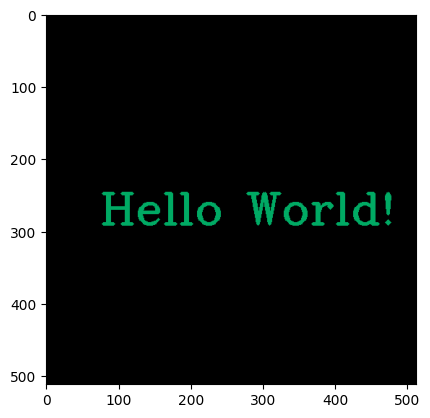

In [53]:
image = np.zeros((512,512,3), np.uint8)

cv2.putText(image, 'Hello World!', (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
plt.imshow(image[...,::-1])

افزودن نوشته فارسی

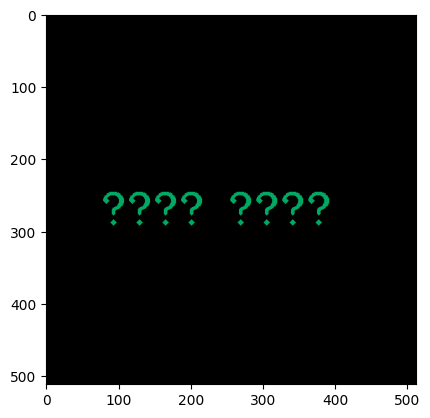

In [54]:
image = np.zeros((512,512,3), np.uint8)
text = "سلام دنیا"
cv2.putText(image, text, (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
plt.imshow(image[...,::-1])

In [ ]:
!pip install arabic_reshaper

In [ ]:
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 4.5 MB/s eta 0:00:00


In [56]:
#!pip uninstall arabic-reshaper python-bidi
!pip install arabic-reshaper python-bidi

In [55]:
!pip install pillow

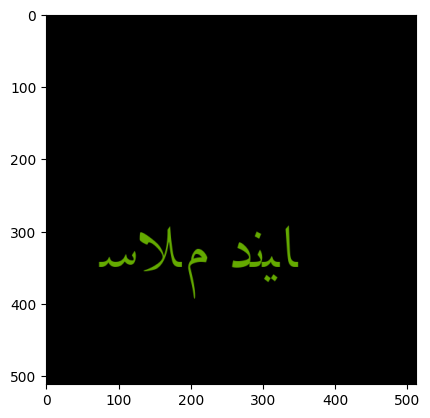

In [ ]:
# install: pip install arabic-reshaper
import arabic_reshaper

# install: pip install python-bidi
from bidi.algorithm import get_display

from PIL import Image, ImageFont, ImageDraw


image = np.zeros((512,512,3), np.uint8)

text_to_be_reshaped = 'سلام دنیا'
reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped) # seperated chars problem
bidi_text = get_display(reshaped_text) #direction problem


text = bidi_text.encode().decode('utf-8') #encoding problem (rectangular boxes!)

pil_image = Image.fromarray(image)
#font = ImageFont.truetype("arial", 100, encoding='unic')
font_path = "/content/drive/MyDrive/font/BLotus.ttf"  # مسیر کامل فونت
#font = ImageFont.truetype(font_path, 100)  #
font = ImageFont.truetype(font_path, 100, encoding='unic')
draw = ImageDraw.Draw(pil_image)
draw.text((75,290), text, (100,170,0), font=font)

plt.imshow(pil_image)

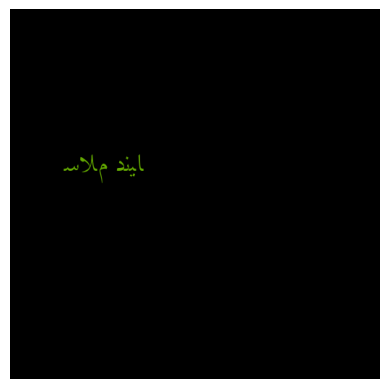

In [ ]:
# نصب کتابخانه‌ها
# install: pip install arabic-reshaper python-bidi
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageFont, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# ساخت تصویر خالی
image = np.zeros((512, 512, 3), dtype=np.uint8)

# متن فارسی
text_to_be_reshaped = 'سلام دنیا'
reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)  # مرتب‌سازی حروف
bidi_text = get_display(reshaped_text)  # تنظیم جهت متن راست‌به‌چپ

# مسیر فونت و تنظیمات آن
font_path = "/content/drive/MyDrive/font/BLotus.ttf"  # مسیر کامل فونت BLotus
font = ImageFont.truetype(font_path, 40)  # بارگذاری فونت با اندازه 40

# تبدیل تصویر به فرمت PIL و رسم متن
pil_image = Image.fromarray(image)
draw = ImageDraw.Draw(pil_image)
draw.text((75, 200), bidi_text, fill=(100, 170, 0), font=font)  # رسم متن فارسی

# نمایش تصویر
plt.imshow(np.array(pil_image))
plt.axis("off")
plt.show()


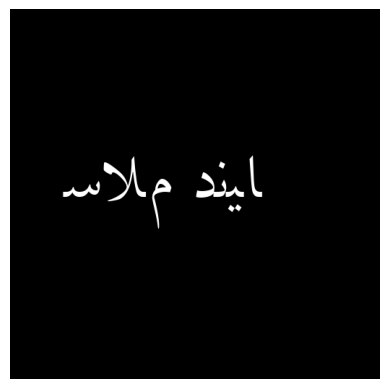

In [57]:
# نصب کتابخانه‌ها
# pip install arabic-reshaper python-bidi
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageFont, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# ساخت تصویر خالی
image = np.zeros((512, 512, 3), dtype=np.uint8)

# متن فارسی
text_to_be_reshaped = 'سلام دنیا'
reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)  # مرتب‌سازی حروف فارسی
bidi_text = get_display(reshaped_text)  # تنظیم جهت راست به چپ

# مسیر فونت
font_path = "/content/drive/MyDrive/font/BLotus.ttf"  # مسیر فونت
font = ImageFont.truetype(font_path, 100)  # تنظیم فونت با اندازه 100

# تبدیل تصویر به فرمت PIL و رسم متن
pil_image = Image.fromarray(image)
draw = ImageDraw.Draw(pil_image)
draw.text((75, 200), bidi_text, fill=(255, 255, 255), font=font)  # رسم متن

# نمایش تصویر
plt.imshow(np.array(pil_image))
plt.axis("off")
plt.show()


In [ ]:
np.asarray(pil_image).shape

(512, 512, 3)

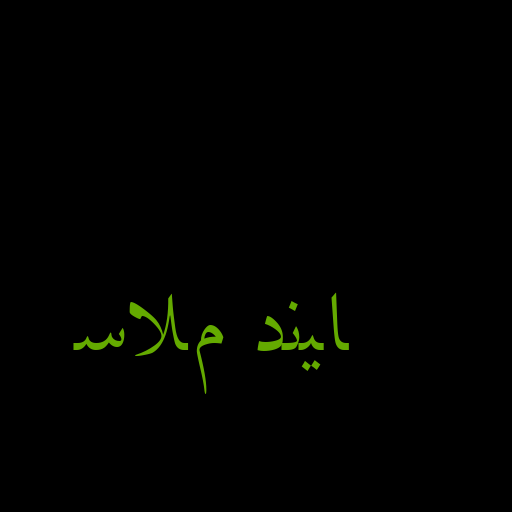

In [ ]:
open_cv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
cv2_imshow(open_cv_image)

Load a custom font

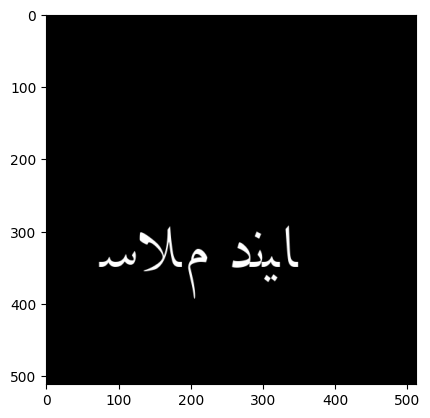

In [ ]:
image = np.zeros((512,512,3), np.uint8)
pil_image = Image.fromarray(image)


font = ImageFont.truetype(font='/content/drive/MyDrive/font/BLotus.ttf', size=100, encoding='unic')
draw = ImageDraw.Draw(pil_image)
draw.text((75,290), text, (255,255,255), font=font)

plt.imshow(pil_image)

#Arithmetic Operation


عملیات ریاضی (Arithmetic Operations)
عملیات ساده‌ای است که به ما این امکان را می‌دهد که به طور مستقیم شدت رنگ را اضافه یا کم کنیم.
عملیات بر روی خانه های نظیر به نظیر دو آرایه با ابعاد یکسان انجام شده و نتیجه نهایی کاهش یا افزایش روشنایی تصویر خواهد بود.
یادآوری
با توجه به اینکه برای تصاویر در OpenCV ار نوع داده‌ای uint8 یعنی عدد صحیح بدون علامت 8 بیتی استفاده میکنیم
و یا توجه به 8 بیتی بودن، این نوع 2 به توان 8 یا 256 عدد مختلف را در خود می‌تواند جای دهد مقادیر خارج از 0 تا 255 امکان پذیر نبود و در صورتی که عددی بزرگتر قرار میدادیم متغیر سر ریز می‌شد...


In [58]:
import numpy as np

a = np.ones([2], dtype = "uint8")
b = a * 100
print(b)
print(b + 155)
print(b + 160)

[100 100]
[255 255]
[4 4]


In [59]:
import numpy as np

m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")
m2 = np.ones([2,2], dtype = "uint8") * 100
print("m1:")
print(m1)
print("m2:")
print(m2)
print("m1+m2:")
print(m1 + m2)

m1:
[[150 155]
 [156 157]]
m2:
[[100 100]
 [100 100]]
m1+m2:
[[250 255]
 [  0   1]]



برای رفع این مشکل راه حل‌های مختلفی وجود داشت، از جمله ...


In [60]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")
m2 = np.ones([2,2], dtype = "uint8") * 100 #or you can simply write 100

modified_m1 = m1.astype('int16') + m2
modified_m1 = np.minimum(modified_m1, 255)
modified_m1 = modified_m1.astype('uint8')
modified_m1

array([[250, 255],
       [255, 255]], dtype=uint8)

In [61]:
import numpy as np

m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")

value_to_add = 100
max_threshold = 255 - 100

m1[m1 >= max_threshold] = 255
m1[m1 < max_threshold] += value_to_add

print(m1)

[[250 255]
 [255 255]]



عملیات ریاضی در OpenCV
اگر از توابع cv2.add و cv2.subtract استفاده کنیم این مشکل را مشاهده نخواهیم کرد و مقادیر کمتر از 0 همان 0 و مقادیر بیش از 255 همان 255 باقی خواهد ماند.


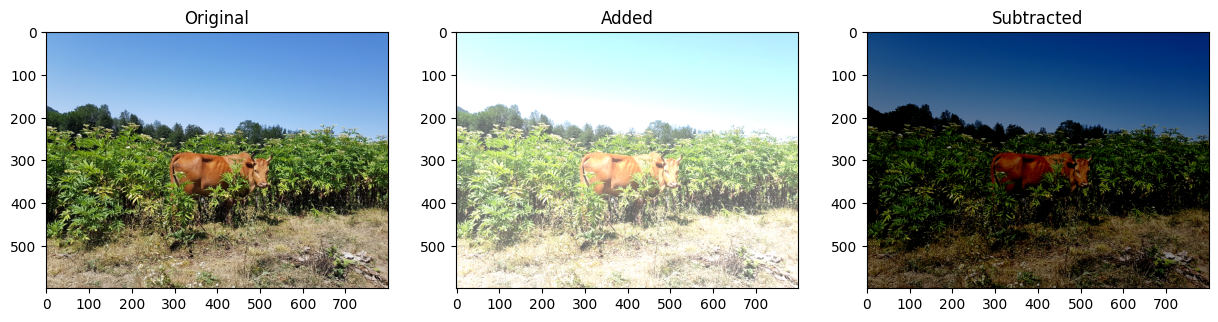

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/images/input (1).jpg')

# Create a matrix of ones, then multiply it by a scaler of 100
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100

added = cv2.add(image, M)
subtracted = cv2.subtract(image, M)


plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(added[...,::-1]);plt.title("Added");
plt.subplot(133);plt.imshow(subtracted[...,::-1]);plt.title("Subtracted");


#cv2_imshow( image)
#cv2_imshow( added)
#cv2_imshow( subtracted)

 مثال عملی ترکیب تصاویر رنگی

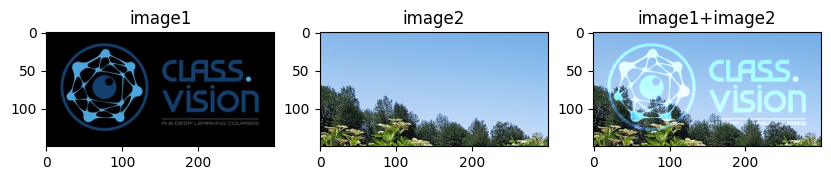

In [69]:
import cv2
import numpy as np

img1 = cv2.imread('/content/drive/MyDrive/images/class.vision.jpg')
shape = img1.shape
img2 = cv2.imread('/content/drive/MyDrive/images/input (1).jpg')[100:100+shape[0], 100:100+shape[1],:]

output_image = cv2.add(img1,img2)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(img1[...,::-1]);plt.title("image1");
plt.subplot(132);plt.imshow(img2[...,::-1]);plt.title("image2");
plt.subplot(133);plt.imshow(output_image[...,::-1]);plt.title("image1+image2");

In [72]:
import cv2
import numpy as np

img1 = cv2.imread('/content/drive/MyDrive/images/input (1).jpg')
img2 = cv2.imread('/content/drive/MyDrive/images/class.vision.jpg')

print(img1.shape)
print(img2.shape)

(600, 800, 3)
(150, 300, 3)


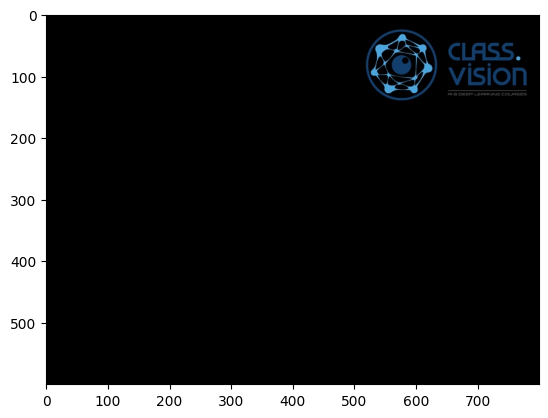

In [73]:
logo_h, logo_w, _ = img2.shape
location_h = 10
location_w = 500
padded_img2 = np.zeros_like(img1)
padded_img2[location_h:location_h+logo_h,location_w:location_w+logo_w,:] = img2
plt.imshow(padded_img2[...,::-1])

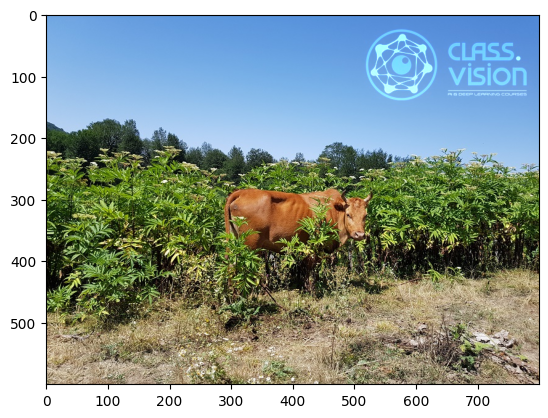

In [74]:
output_image = cv2.add(img1,padded_img2)
plt.imshow(output_image[...,::-1])

تصویر با جمع وزن‌دار

addWeighted(src1, alpha, src2, beta, gamma)
آلفا و بتا در فرمول دوم مشاهده میشود.

g(x)=(1−α)f0(x)+αf1(x)
dst=α⋅img1+β⋅img2+γ
https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html

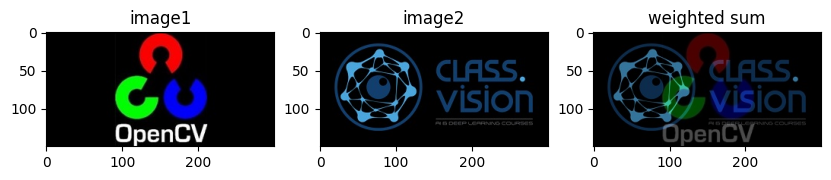

In [76]:
img1 = cv2.imread('/content/drive/MyDrive/images/opencv.jpg')
img2 = cv2.imread('/content/drive/MyDrive/images/class.vision.jpg')
output_image = cv2.addWeighted(img1,0.3,img2,0.7,0)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(img1[...,::-1]);plt.title("image1");
plt.subplot(132);plt.imshow(img2[...,::-1]);plt.title("image2");
plt.subplot(133);plt.imshow(output_image[...,::-1]);plt.title("weighted sum");

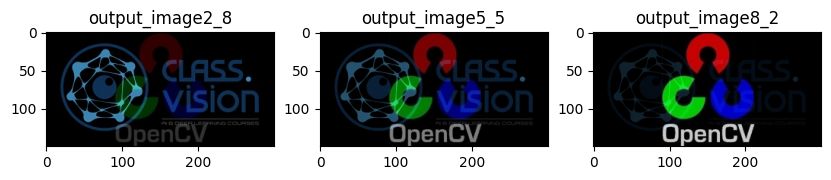

In [77]:
output_image2_8 = cv2.addWeighted(img1,0.2,img2,0.8,0)
output_image5_5 = cv2.addWeighted(img1,0.5,img2,0.5,0)
output_image8_2 = cv2.addWeighted(img1,0.8,img2,0.2,0)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(output_image2_8[...,::-1]);plt.title("output_image2_8");
plt.subplot(132);plt.imshow(output_image5_5[...,::-1]);plt.title("output_image5_5");
plt.subplot(133);plt.imshow(output_image8_2[...,::-1]);plt.title("output_image8_2");